<h1><center><font size="6">Predicting Telco Customer Churn</font></center></h1>

<h2><center><font size="4">Dataset used:Kaggle </font></center></h2>

<h3><center><font size="4"> https://www.kaggle.com/blastchar/telco-customer-churn </font></center></h2>

<a id="top"></a> <br>
## Table of  Contents
1. [Introduction](#1)

1. [Initialization](#2)
    1. [Load packages](#21)
    1. [Define Metadata](#22)
    
1. [Load Data](#3)

1. [Data Insights](#4)
    1. [Data Structure](#41)
    1. [Summary Stats](#42)
    1. [Unique Value Checking](#43)
    1. [Identifying 'Bad Columns'](#44)

1. [Data Cleansing](#5)
    1. [Data Reduction](#51)
        1. [Dropping Bad Columns](#511)
        1. [Null Value Removal](#512)
    1. [Data Type Conversion](#52)

1. [Modelling Workflow](#6)
    1. [Data Prep](#61)
        1. [Categorical to Ordinal Encoding](#611)
        1. [Normalizing Numerical Variables](#612)
        1. [Feature Target Split](#613)
        1. [Train-Test Split](#614)
    1. [Estimate of Baseline Accuracy - Class Distributions](#62)
    1. [Predictive Modelling](#63)
        1. [ML Model Fitting](#631)
        1. [Model Performance Metrics Report](#632)
    1. [Performance Metrics for Imbalanced Datasets](#64)
    
1. [References](#7)

# <a id='1'>Introduction</a>  

Assume you work for a Telco and would like to predict which of the customers will churn. this will allow the sales team to proactively reach out and offer freebies to entice the customers to stay

"The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents"


## <a id='2'>Initialization</a>  


### <a id='21'>Load Packages</a>  

Load the minimum number of packages to get started and add more as we go along

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# This is to suppress any deprecation warnings 

import os

import sys
sys.path.append("/home/paperspace/Kaggle Grandmaster/Udemy Superstar/Classification") # Adds higher directory to python modules path.


### <a id='22'>Define Metadata</a>  

In [2]:
# Define the name of the target class column here instead of manually typing it out everywhere
target_class_name = 'Churn'

# Fill in the names of what you want to call the 0 and 1 class
labels = ['Retained', 'Churn']

input_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

intermediate_data_path = '../intermediate data/'

cleaned_dataframe_name = 'day1_cleaned_df_output_' 

# Enter the date in which this notebook is run
export_date = '20200501'

In [3]:
# Check ou tthe names of the files in the input folder that we need to load as dataframe
import os
print(os.listdir('../input'))
# This will list all the files in this folder

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


## <a id='3'>Load Data</a>  

In [4]:
df = pd.read_csv('../input/' + input_file_name, index_col='customerID')
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6968-MHOMU,Male,0,Yes,No,58,No,No phone service,DSL,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),45.00,2689.35,No
8328-SKJNO,Male,0,No,Yes,23,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),40.65,947.4,No
7253-UVNDW,Female,0,No,No,46,Yes,No,DSL,No,No,Yes,Yes,No,No,Two year,No,Credit card (automatic),54.35,2460.15,Yes
7274-RTAPZ,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.55,90.55,Yes
2391-IPLOP,Male,0,Yes,Yes,50,Yes,Yes,DSL,No,No,Yes,Yes,Yes,No,One year,Yes,Electronic check,69.65,3442.15,No


Lets check the head & tail to make sure there is nothing going on

In [7]:
df.head(3)
# What you are checking here is whether there are some unwanted headers from teh input file that 
# can corrupt our data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [8]:
df.tail(3)
# similar logic here

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


No trouble with loading the data. Both the head and tail are clean

## <a id=4 > Data Insights

### <a id='41'>Data Structure</a> 

In [9]:
# Lets see the data structure
df.info()
# This will give you how many rows & columns are there

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


The object columns will need to be investigated. Senior Citizen is actually a binary column but wil leave it as is. TotalCharges is a numerical column that may contain nulls because its getting picked up as a object column

In [10]:
# check the TotalCharges column
df['TotalCharges'].unique()
# These seem to be recognized as strings. We will convert them to numbers later in the notebook

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

### <a id='42'>Summary Stats</a> 

In [11]:
df.describe()
# check out each column's summary statistics to and infer and have follow on visualizations 
# Note that only the numerical columns will be described. Make sure to ignore non-numerical columns
# like 'customer_id' before you describe
# Also you will want to exclude the integer columns

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### <a id='43'>Unique Value Checking</a> 

In [12]:
for column in df.columns:
    print(column, len(df[column].unique()))

gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


### <a id='44'>Identifying Bad Columns</a> 

In [13]:
from helper_functions_comprehensive import find_bad_columns_function

null_col_list, blank_space_col_list, constant_numeric_col_list, \
constant_non_numeric_col_list, duplicate_col_list = find_bad_columns_function(df)

Identified 0 features with atleast one null
Identified 1 features with atleast one blank space
Identified 0 numeric features that have quasi-constant values
Identified 0 non-numeric features that have quasi-constant values
Identified 0 features that are duplicates of other features


In [14]:
blank_space_col_list

['TotalCharges']

We have 1 column where there are blank values

## <a id='5'>Data Cleansing</a> 

#### <a id='511'>Dropping Bad Columns</a> 

In [15]:
# In this dataset, we dont have any duplicated columns or those which have near-constant values
# But if they do show up, you should go ahead and delete them to reduce overfitting

print('Before dropping irrelevant features and duplicated columns,')
print('{} number of columns were present'.format(len(df.columns)))

for drop_column_list in [constant_numeric_col_list, constant_non_numeric_col_list, duplicate_col_list]:
    df.drop(drop_column_list, axis=1, inplace=True)

print('After dropping the above, ')
print('{} number of columns are present'.format(len(df.columns)))

# No need to change this code because we are always going to drop these 3 types of columns

Before dropping irrelevant features and duplicated columns,
20 number of columns were present
After dropping the above, 
20 number of columns are present


In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### <a id='512'>Null Value Removal</a> 

In [17]:
df.drop(null_col_list, axis=1, inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
print('Number of rows before blank null values are removed is {}'.format(len(df)))

# drop rows with blank spaces
for blank_col in blank_space_col_list:
    df = df[df[blank_col]!=' ']

print('Number of rows after blank null values are removed is {}'.format(len(df)))

# How many rows were dropped ?

Number of rows before blank null values are removed is 7043
Number of rows after blank null values are removed is 7032


#### <a id='513'>Data Type Conversion</a> 

#### <a id='531'>Fixing Data types</a> 

In [19]:
# Change the TotalCharges column into float from str    
float_column_list = ['TotalCharges']

for column in float_column_list:
    df[column] = df[column].astype(float)

#### Recheck bad columns

Run a quick check with the duplicate columns and quasi constant
functions because turning from strings to floats will allow these to now be picked up differently

In [20]:
null_col_list, blank_space_col_list, constant_numeric_col_list, \
constant_non_numeric_col_list, duplicate_col_list = find_bad_columns_function(df)

Identified 0 features with atleast one null
Identified 0 features with atleast one blank space
Identified 0 numeric features that have quasi-constant values
Identified 0 non-numeric features that have quasi-constant values
Identified 0 features that are duplicates of other features


In [21]:
# The Total Charges column is now not causing any more issues

#### <a id='532'>Data Encoding</a> 

##### <a id='5321'>Categorical to Ordinal encoding</a> 

In [22]:
# This step is needed if you want to convert all categorical columns to ordinal encoded numbers
# Works only with tree-based algorithms but not for linear models or neural nets
# Filter the above object columns based on the object data type

object_columns = df.select_dtypes(include=['object']).columns
df[object_columns].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [23]:
# This method of Label Encoding assumes that we are using Tree-based models later.

from sklearn.preprocessing import LabelEncoder

# Iterate through the object columns and convert them one by one into a numerical column
for column in object_columns:
    # Instantiate a labelencoder object and then do the fit transform on the data
    labelencoder = LabelEncoder()
    df[column] = labelencoder.fit_transform(df[column])
    
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [25]:
import pickle
pickle.dump(df, open(intermediate_data_path+cleaned_dataframe_name + export_date + '.pkl', 'wb'))

## <a id = 6 > Modelling Workflow

### <a id = 61 > Data Prep 

#### <a id = 612 > Normalizing numerical variables

Now that we have numerical features, can we feed it directly into a tree based model like Random Forest? Ye,s even without scaling or normalizing. Scaling has the effect of squeezing all data range into a tight range but is not required for Tree-based ML models

#### <a id='613'>Feature - Target Split</a> 

In [26]:
X = df.drop(target_class_name, axis=1)
y = df[target_class_name]

#### <a id='614'>Train-Test Split</a> 

In [27]:
# split into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Note optionally convert the pandas dataframe into a numpy array using to_numpy if you have a big data
# and want to model faster. Otherwise it doesnt matter which data structure you use

### <a id='62'>Estimate of baseline accuracy - Class Distributions </a> 

In [28]:
# Figure out the class distribution percentage and round it to 3 decimal places

print('Percentage of Negative class is {} %'.format(
    round(df[target_class_name].value_counts()[0]/len(df) * 100,3)))

print('Percentage of Positive class is {} %'.format(
    round(df[target_class_name].value_counts()[1]/len(df) * 100,3)))

# A dumb model that predicts everything as being 0, will generate a baseline accuracy of 99.8%

Percentage of Negative class is 73.422 %
Percentage of Positive class is 26.578 %


0    5163
1    1869
Name: Churn, dtype: int64

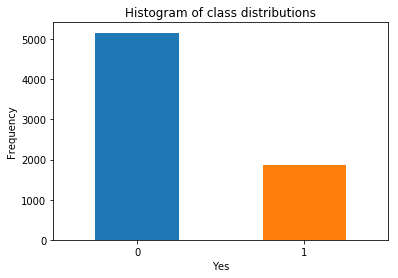

In [29]:
plt.figure(figsize=(6,4))
pd.value_counts(df[target_class_name]).plot.bar()
plt.title('Histogram of class distributions')
plt.xlabel(labels[1])
plt.xticks(rotation=0)
plt.ylabel('Frequency')
df[target_class_name].value_counts()

The baseline accuracy to beat is 73%

What about the other metrics like Precision, Recall and F1 score?
They would all be 0% for the positive class

### <a id='63'>Predictive Modelling</a> 

#### <a id='631'>ML Model Fitting</a> 

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a classifier object with default params
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### <a id='632'>Model Performance Metrics</a> 

Has a Train accuracy of 98.0 % 
              precision    recall  f1-score   support

          No       0.98      1.00      0.99      4130
         Yes       1.00      0.94      0.97      1495

   micro avg       0.98      0.98      0.98      5625
   macro avg       0.99      0.97      0.98      5625
weighted avg       0.98      0.98      0.98      5625

The ROC AUC Score on Train set is 1.0
Confusion matrix, without normalization
[[4123    7]
 [  93 1402]]


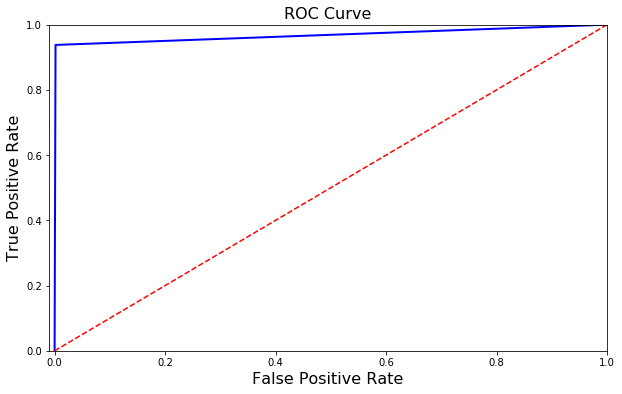

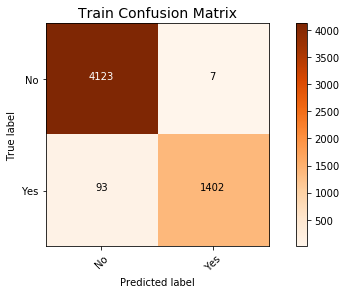

In [31]:
from helper_functions_comprehensive import custom_classification_metrics_function
custom_classification_metrics_function(X_train, y_train, labels, classifier, data_type='Train')

Has a Test accuracy of 78.0 % 
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1033
         Yes       0.63      0.44      0.51       374

   micro avg       0.78      0.78      0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407

The ROC AUC Score on Test set is 0.77
Confusion matrix, without normalization
[[936  97]
 [211 163]]


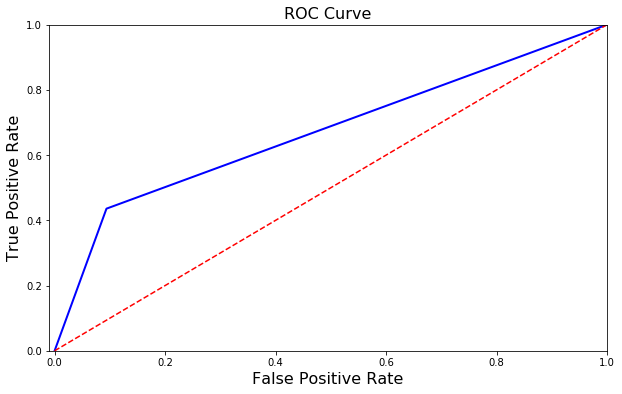

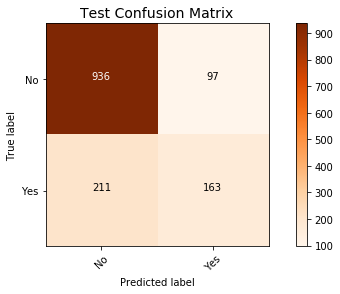

In [32]:
from helper_functions_comprehensive import custom_classification_metrics_function

custom_classification_metrics_function(X_test, y_test, labels, classifier, data_type='Test')

The idea here is to come up with a metric that will allow us to compare performance across different models.
This article describes why ROC AUC and F1 score are not the right metrics for imbalanced datasets
https://towardsdatascience.com/selecting-the-right-metric-for-skewed-classification-problems-6e0a4a6167a7

The F1 score is sensitive to imbalance but its unable to differentiate between a good recall or a good precision
due to the symmetrical nature of the formula 
F1 = 2*(Precision * Recall)/(Precision + Recall)

In [34]:
from helper_functions_comprehensive import precision_at_recall_threshold_function

predicted_proba = classifier.predict_proba(X_test)[:,1]
precision_at_recall_threshold_function(y_test, predicted_proba, recall_threshold=0.85)


0.3568421052631579

The really low score begs the question on whether this dataset has sufficiently separable signal

### <a id =64 > Visualize Class Separation

Lets reduce the dimensions to 2D and visualize the class separation. Code adapted from Kaggle
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [48]:
%%time

# T-SNE Implementation
from sklearn.manifold import TSNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

from sklearn.decomposition import PCA, TruncatedSVD
# PCA Implementation
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', 
                             random_state=42).fit_transform(X.values)

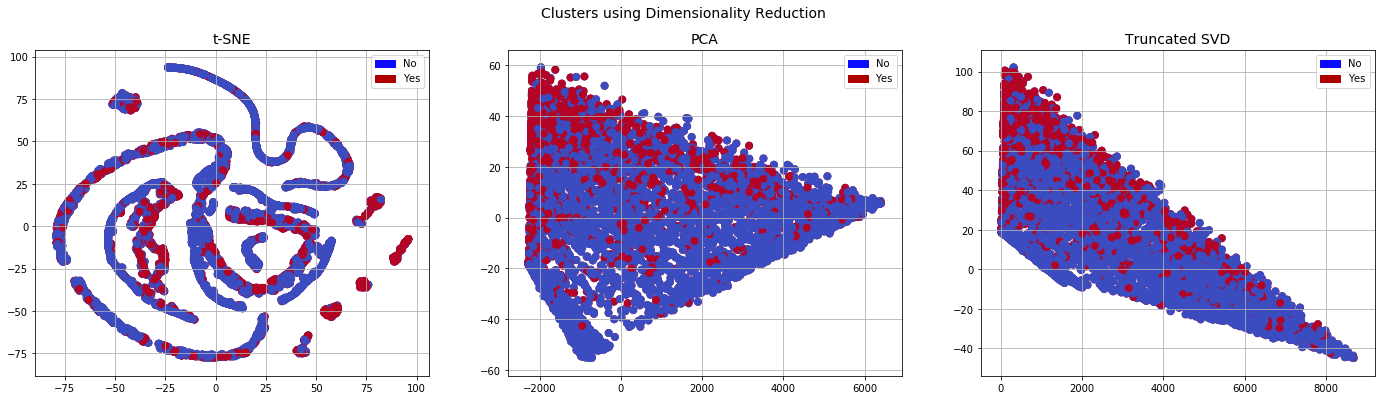

In [49]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label=labels[0])
red_patch = mpatches.Patch(color='#AF0000', label=labels[1])


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], 
            c=(y == 0), cmap='coolwarm', label=labels[0], linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], 
            c=(y == 1), cmap='coolwarm', label=labels[1], linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], 
            c=(y == 0), cmap='coolwarm', label=labels[0], linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], 
            c=(y == 1), cmap='coolwarm', label=labels[1], linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], 
            c=(y == 0), cmap='coolwarm', label=labels[0], linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], 
            c=(y == 1), cmap='coolwarm', label=labels[1], linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Seems that the positive class (denoted by red) is embedded deep into the negative class space. No wonder our go-to classifier, RandomForest, struggled to give a good result!

In [ ]:
# In Day 2 we are going to try and improve model performance by cleaning the features after upsampling

## <a id =7 > References

https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
    Code for PCA taken from above